In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [3]:
lambda_ = 589.3*(10**-6) # in mm

In [22]:
def straight_line(x, m, c): return m*x + c
def plotting_function(xs, ys, popt, pcov, xlabel='', ylabel='', plot_shape='kD', round_to=4, tex_pos=(0.5, 0.15)):
    text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
    text += f"    m = {format(popt[0], '.4g')} ± {format(pcov[0][0]**0.5, '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1]**0.5, '.4g')}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), '--k')

    plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    plt.title(r'Graph 1: $\theta$ vs $T$'+' least-square fit\n(Gayatri P - 2211185)')

    plt.text(tex_pos[0], tex_pos[1], text, fontsize=12, transform=plt.gcf().transFigure)

In [6]:
data = [{
    'temp': 25.9,
    'fringes': np.array([0.07, 1.92, 3.84, 5.85, 7.98])
},
{
    'temp': 37.3,
    'fringes': np.array([0.14, 1.7, 3.33, 4.96, 6.81])
},
{
    'temp': 50.5,
    'fringes': np.array([0.2, 1.76, 3.31, 4.91, 6.59])
},
{
    'temp': 61.9,
    'fringes': np.array([0.15, 1.51, 2.9, 4.36, 5.86])
}]

In [7]:
thetas, temps = [], []
table = []

for temp_set in data:
    temps.append(temp_set['temp']+273.15)
    widths = np.diff(temp_set['fringes'])
    beta = np.mean(widths)/5
    theta = np.arctan(lambda_/(2*beta))*1000 # x 10e3
    thetas.append(theta)
    
    table.append([widths, temp_set['fringes']])


thetas = np.array(thetas)
temps = np.array(temps)

If the Equation is y = mx + c
For the best fit curve:
    m = 0.007376 ± 0.001211
    c = -1.443 ± 0.3843

The curve looks like:


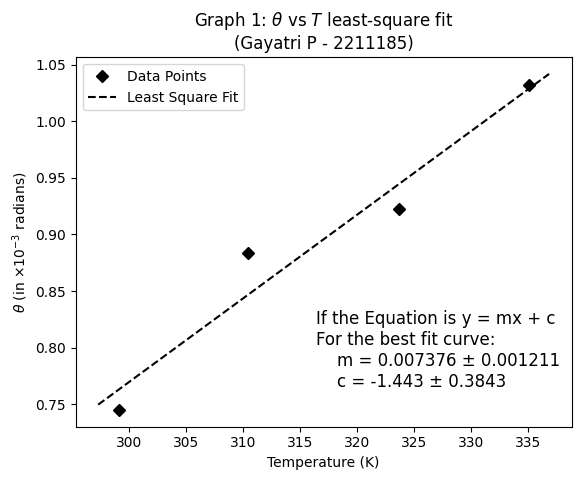

In [23]:
curve = curve_fit(straight_line, temps, thetas)
plotting_function(temps, thetas, curve[0], curve[1], 'Temperature (K)', r'$\theta$ (in $\times 10^{-3}$ radians)')

In [14]:
l = 5.6 # length of the glass plate - in cm 
L = 2.08 # og length of rod - in cm
slope, err_slope = curve[0][0], curve[1][0][0]

alpha = (l*curve[0][0]*0.001)/L
delta = alpha*np.sqrt((0.1/l)**2 + (0.001/L)**2 + (err_slope/slope)**2)

print(f'Coefficient of linear expansion: ({round(alpha*10**6, 3)} \u00B1 {round(delta*10**6, 3)}) x 10e-6 K^-1')

Coefficient of linear expansion: (19.859 ± 0.355) x 10e-6 K^-1


In [13]:
thetas

array([0.74500618, 0.88350802, 0.92222196, 1.03204867])